<a href="https://colab.research.google.com/github/Javeria-Arif/ReplacingBackground/blob/main/Replacing_BG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

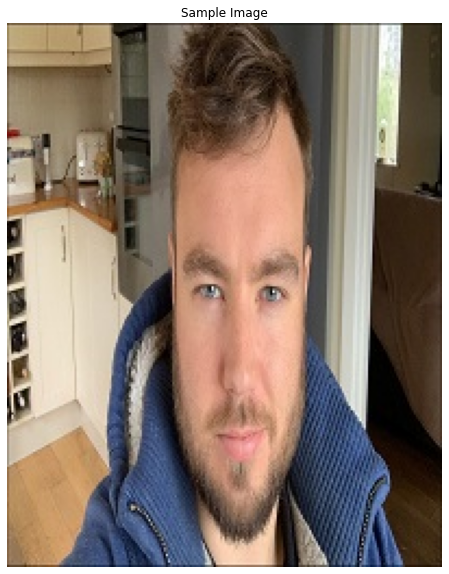

In [ ]:
!pip install mediapipe
import os
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from time import time

# Initializing mediapipe segmentation class.
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# Setting up Segmentation function.
segment = mp_selfie_segmentation.SelfieSegmentation(0)

# Read an image from the specified path.
sample_img = cv2.imread('img5.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

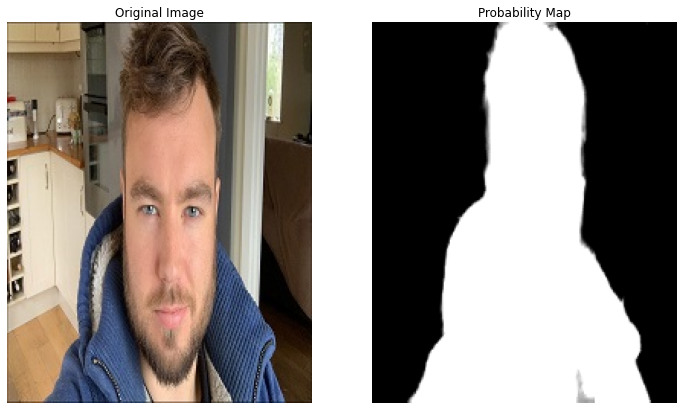

In [ ]:
# Convert the sample image from BGR to RGB format.
RGB_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# Perform the segmentation.
result = segment.process(RGB_sample_img)

# Specify a size of the figure.
plt.figure(figsize=[12,12])

# Display the original sample image and the segmentation result with appropriate titles. 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(result.segmentation_mask, cmap='gray');plt.title("Probability Map");plt.axis('off');

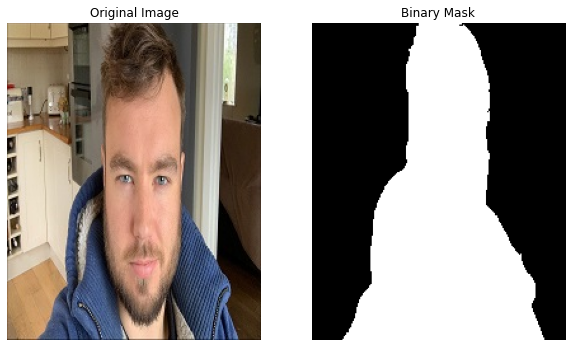

In [ ]:
# Get a binary mask having pixel value 1 for the person and 0 for the background.
# Pixel values greater than the threshold value 0.9 (90% Confidence) will become 1 and the remaining will become 0.
binary_mask = result.segmentation_mask > 0.5      #0.9


# Display the original sample image and the binary mask with appropriate titles. 
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(binary_mask, cmap='gray');plt.title("Binary Mask");plt.axis('off');

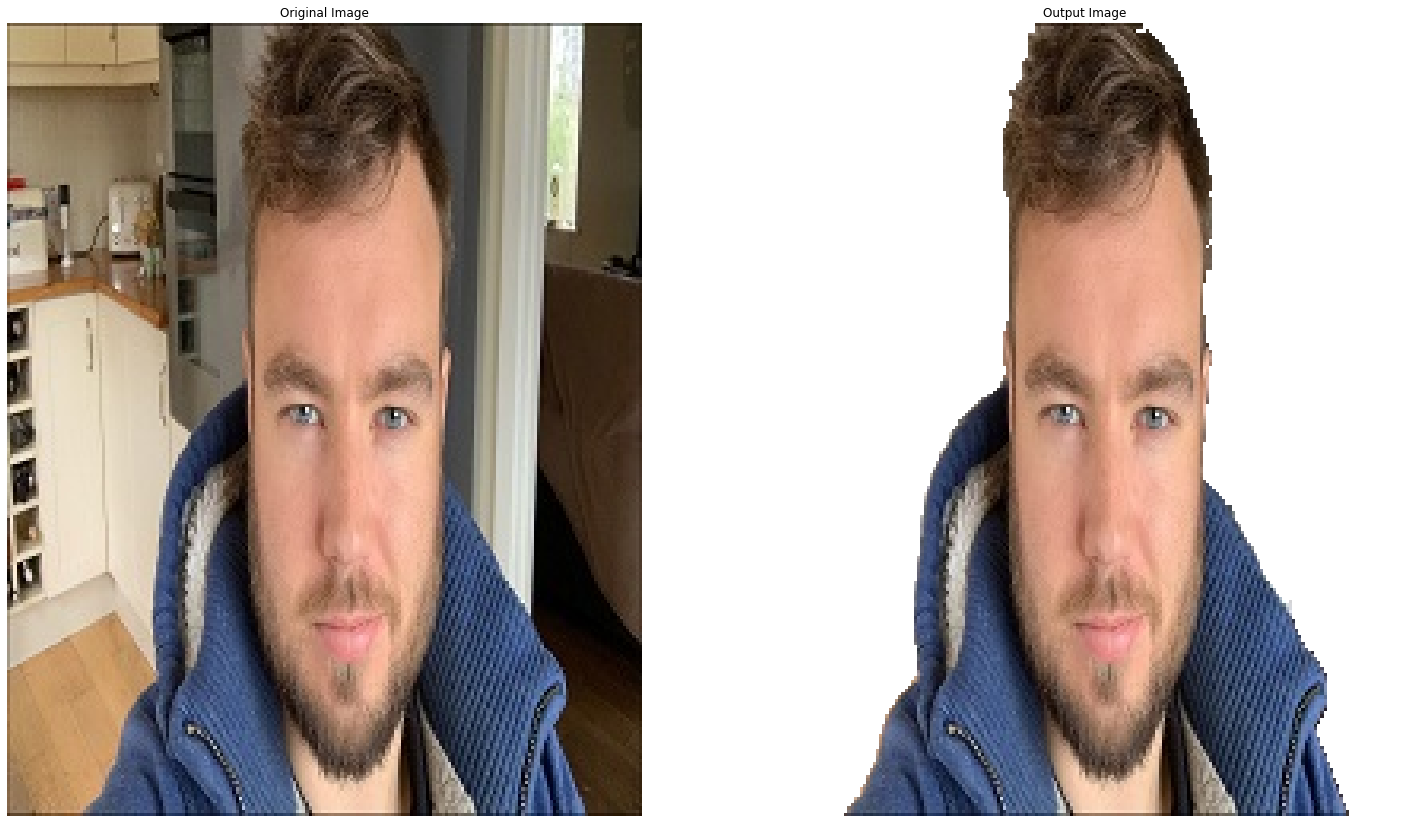

In [ ]:
# Stack the same mask three times to make it a three channel image.
binary_mask_3 = np.dstack((binary_mask,binary_mask,binary_mask))

# Create the output image to have white background where ever black is present in the mask.
output_image = np.where(binary_mask_3, sample_img, 255)    

# Specify a size of the figure.
plt.figure(figsize=[25,25])

# Display the original sample image and the resultant image. 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');